<a href="https://colab.research.google.com/github/fatihdursunfd/machine_learning/blob/fd/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
max_value = 27

In [3]:
def plot_coordinatesystem():
  
  a = [i for i in range(-max_value,max_value,1)]
  b = [0 for i in range(max_value * 2 )]

  plt.plot(a , b , color="black")
  plt.plot(b , a ,color="black")

  for j in range(-max_value,max_value,1):

    c = [j for i in range(max_value * 2 )]
    plt.plot(a , c ,color="gray",linewidth=0.2)
    plt.plot(c , a ,color="gray",linewidth=0.2)

In [4]:
def euclidean_distance(sample , c):
  return np.sqrt( np.square(sample[0] - c[0]) +  np.square(sample[1] - c[1]) )

In [5]:
def calculate_center_of_mass(x , y , d , n_samples , n_class):

  n_class = int(n_class)
  c_mass = [ 0 for i in range(n_class * 2) ]

  for j in range(n_class):

      sum_x = 0
      sum_y = 0
      len = 0

      for i in range(n_samples):

          if d[i] == j :
            sum_x = sum_x + x[i]
            sum_y = sum_y + y[i]
            len = len + 1

      if len != 0 :
        c_mass[2*j] =  sum_x / len
        c_mass[2*j+1] =  sum_y / len
  
  #print(c_mass)
  return c_mass

In [6]:
colors = ["#e6dd3b" , "#9c3d54" , "#31326f" , "#d8c292" , "#1a1c20"]

n_samples = 1500
#n_class = int( np.round(np.sqrt(n_samples)) )
n_class = 3

d = [0 for i in range(n_samples)]

# samples 
x = np.random.uniform(-1,1,n_samples) * max_value
y = np.random.uniform(-1,1,n_samples) * max_value

# center of mass
c = np.random.uniform(-1,1,n_class*2) * max_value

In [7]:
for index in range(5):

  distance = [0 for i in range(n_class)]

  for i in range(n_samples):
    sample = np.array([x[i],y[i]])

    for j in range(int(n_class)):
        c_m = [c[2*j] , c[2*j + 1]]
        distance[j] = euclidean_distance(sample , c_m)

    index = distance.index(min(distance))
    d[i] = index

    c_mass = calculate_center_of_mass(x , y , d , n_samples , n_class)
    c = c_mass

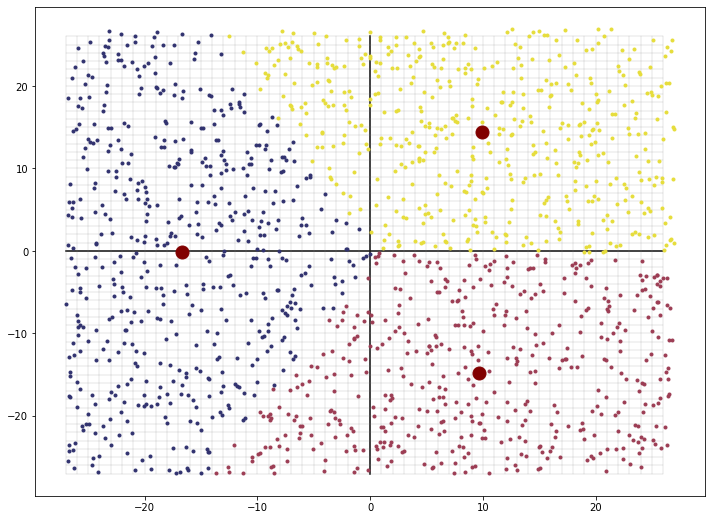

In [8]:
plt.figure(figsize=(12,9))
plot_coordinatesystem()

for i in range(n_samples):
  plt.plot(x[i] , y[i] , color = colors[d[i]] , marker = "o" , markersize=3)

for i in range(n_class):
  plt.plot(c[2*i] , c[2*i+1] , color="#810000" , marker = "o", markersize = 13)

plt.show()